# IS 445 - Group 5 - Final Project
#### Group Members: Nataly Panczyk, Betty Guerrero, Thomas McShane, Shubham Jain

## Objective

The goal of this project was to create a variety of complementary visualizations using data collected from the 2020 World Happiness Report. This notebook will provide a walk through of the final visualizations created by our group as well as descriptions for each visualization, major challenges in creating that visualization, and why we think these visualizations are valuable.

## About the Data
 https://worldhappiness.report/ed/2021/#appendices-and-data

The first eight World Happiness Reports were produced by the founding trio of co-editors assembled in Thimphu in July 2011 pursuant to the Bhutanese Resolution passed by the General Assembly in June 2011 that invited national governments to "give more importance to happiness and well-being in determining how to achieve and measure social and economic development." The overall goal of this organization is to create new metrics for measuring economic progression around the world beyond fiscal quantities. This dataset was particularly interesting to us because it's funded and supported by prominent universities, non-profits, and private companies, and shows one effective impact of these types of institutions when they work collaboratively for a genuinely good cause. This dataset seeks to benefit the development of our world for the humans that inhabit it, which is what inspired us to choose it for our final visualization project. 

## Comparing Life Expectancies in Different Countries From 2005 to 2006
The first component of this dataset that our group sought to analyze was the life expectancy in the various countries over time. We went about creating this visualization by first sorting the data by country, and then plotting the various points in 2 different ways using ipywidgets. First, the plot will display a checkbox that defaults to the static visualization. This will show the life expectancies in every country with a different colored marker (as indicated by the legend) for each year in the dataset, 2006-2020. By unchecking this box, a new widget will appear (a slider), that allows the user to define the end year of the dataset. This allows for the user to interact with the visualization on a more iterative level and identify the countries with the greatest changes in life expectancy more easily. The greatest difficulty we faced in creating this visualization was getting ipywidgets to update our plots when the sliders and checkboxes were interacted with. Eventually, we resolved this issue by using the %matplotlib notebook command instead of %matplotlib inline.

<IPython.core.display.Javascript object>


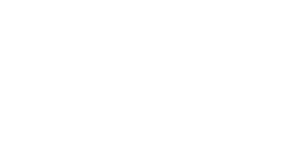

interactive(children=(Checkbox(value=True, description='Static'), Output()), _dom_classes=('widget-interact',)…

<function __main__.static_plot(Static)>

In [30]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib notebook

# use pandas to read the csv from the World Happiness Report
url = 'https://raw.githubusercontent.com/npanczyk/npanczyk.github.io/main/happiness.csv'
df = pd.read_csv(url)
# sort the data by year
sorted_df = df.sort_values(by='year')
# make an array of the sorted data
sorted_arr = sorted_df.values
# array of years (in order)
ordered_years = sorted_arr[:,1]
# find the index of the last entry of 2005 (earliest year)
year_list = np.arange(2005, 2021, 1)
l_list = np.zeros(len(year_list))
for year in ordered_years:
    for i in range( len(l_list)):
        if year == year_list[i]:
            l_list[i] += 1
            if i < len(l_list) - 1:
                l_list[i + 1] = l_list[i]
        else:
            continue
l = int(l_list[0])
early_data = sorted_arr[0:l,:]
# repeat this process in reverse to find the 2020 data
sorted2_df = df.sort_values(by='year', ascending=False)
sorted2_arr = sorted2_df.values
# array of years (in reverse order)
reverse_years = sorted2_arr[:,1]
# find the index of the last entry of 2020 (latest year)
l2 = 0
for i in reverse_years:
    if i == 2020:
        l2 += 1
    else:
        break
        
late_data = sorted2_arr[0:l2,:]
late_countries = late_data[:,0]

total_countries = np.unique(sorted_arr[:,0])

# 2005 data to plot
early_countries = early_data[:,0]
early_life_exp = early_data[:,5]


plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(25,8))

def make_plot(year):
    def plot_country(year):
        if year == 2005:
            return ax.plot(early_countries, early_life_exp, marker='o', ls='', label='2005')
        else:
            stop = np.where(year_list == year)[0]
            start = stop - 1
            data = sorted_arr[int(l_list[start]):int(l_list[stop]),:]
            countries = data[:,0]
            life_exp = data[:,5]
            return ax.plot(countries, life_exp, marker='o', ls='', label=str(year))
    plot_country(year)
    ax.set_title('Life Expectancy by Country from 2005-2020')
    ax.set_xlabel('Country')
    ax.set_ylabel('Life Expectancy at Birth (Years)')
    ax.set_xticks(total_countries)
    ax.set_xticklabels(total_countries,rotation=90)
    ax.legend(loc='upper right')
    return

def static_plot(Static):
    if Static == True:
        for i in year_list:
            make_plot(i)
    if Static == False:
        plt.cla()
        interact(slide, year2=(2007,2021,1), continuous_update=True)

def slide(year2):
    plt.cla()
    years = np.arange(2005,year2,1)
    for i in years:
        make_plot(i)

interact(static_plot, Static=True)


## Generosity Rankings by Country and Year
Below is a graph that shows all the countries that are included in our dataset. This graph allows you to be able to see the average generosity of each of the counties in the dataset over the entire time that there has been data for that country. In order to see the generosity of a country simply hover your mouse over the desired country. You can use the square icon on the left to draw a box around an area that you would like to zoom in on. You can also use the icon with four arrows to drag the map around. Lastly, use the home button to revert the graph to its original state

In [31]:
%matplotlib inline

<IPython.core.display.Javascript object>


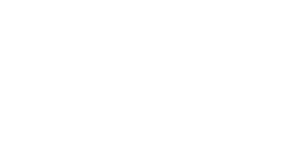

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import mplcursors
from geopy.geocoders import Nominatim
%matplotlib widget

df = pd.read_csv("https://raw.githubusercontent.com/npanczyk/npanczyk.github.io/main/happiness.csv")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = df.groupby(["Country name"]).mean()
country = countries.reset_index()

geolocator = Nominatim(user_agent="Generosity")
lat = []
long = []
for ind in country.index - 1:
    location = geolocator.geocode(country["Country name"][ind+1], timeout = 10)
    if location is None:
        lat.append(np.nan)
        long.append(np.nan)
    else:
        latitude = location.latitude
        longitude = location.longitude  
    
    lat.append(latitude)
    long.append(longitude)
la = pd.DataFrame()
la["lat"] = lat
la["long"] = long

country["lat"] = la["lat"]
country["long"] = la["long"]

c = pd.DataFrame()
c["Country name"] = country['Country name']
c["Generosity"] = country['Generosity']
c["Lat"] = country['lat']
c["Long"] = country['long']

fig, ax = plt.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
sc = ax.scatter(c["Long"], c["Lat"], s = 1)
mplcursors.cursor(hover = True).connect(
    "add", lambda sel: sel.annotation.set_text(c["Generosity"][sel.index]))
plt.show()



## Average Freedom to Make Life Choices Countries
The following two visualizations show the top 3 and lowest 3 countries and their ranking of freedom to make life choices. The data used was the average of the highest 50 countries and the average of the lowest 50 countries across all of the years the data set included.


<Figure size 18000x36000 with 0 Axes>

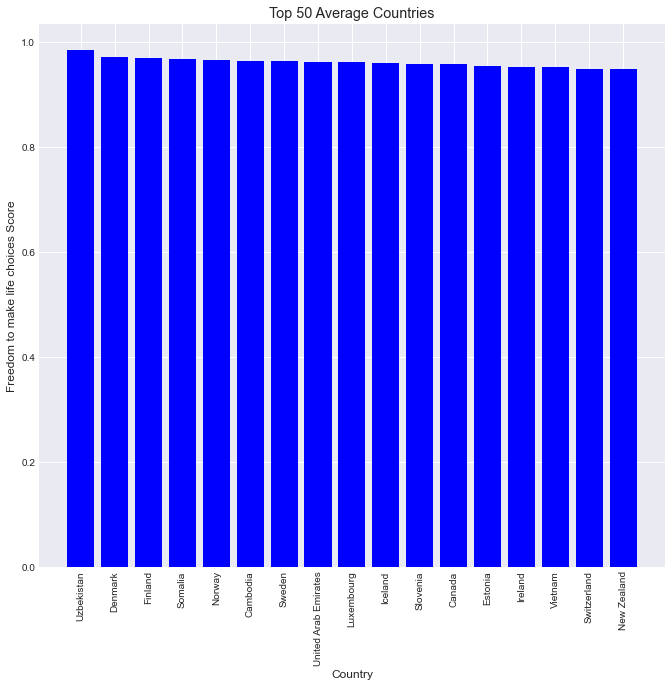

<Figure size 18000x36000 with 0 Axes>

In [33]:
#Load necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries needed for the data import

import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/eguerr23/eguerr23.github.io/main/DataPanelWHR2021.csv" # Make sure the url is the raw version of the file on GitHub


df = pd.read_csv(url)

#Clean data set for relevant columns

df = df.sort_values(by='Freedom to make life choices', ascending=False)[['Country name', 'year', 'Freedom to make life choices']]


relevant = df[["Country name", "year", "Freedom to make life choices"]].head(50)

relevant.sort_values(by='Freedom to make life choices', ascending=False)[['Country name', 'year', 'Freedom to make life choices']]
relevant.groupby('Country name')['Freedom to make life choices'].mean()

#Visualization showing the 50 countries with the highest avg. score of freedom to make life choices of all time in the data set year column

plt.rcParams["figure.figsize"] = (10, 10)
plt.bar("Country name","Freedom to make life choices", data = relevant, color = "blue")
plt.title("Top 50 Average Countries")
plt.xlabel("Country")
plt.ylabel("Freedom to make life choices Score")
plt.xticks(rotation=90)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(250,500))


The above visualization uses data from the top 50 highest averages of all the years between 2005-2020 of the score on a scale of 0-1.0 on their freedom to make life choices. The visualization itself shows the top 17 countries with the highest average scores. From the visualization we can see that Uzbekistan, Denmark, and Finland are the top 3 countries with the highest average scores. This finding was especially interesting given the nature of these three countries. We know that countries like Finland are notorious for having universal health care and paid family time off. It makes me wonder how much of these qualities go into affecting one's perception of being able to make life choices. Another surprising find was that the United States was not one of the countries to make the list which was also very, very surprising to me.

<Figure size 3600x7200 with 0 Axes>

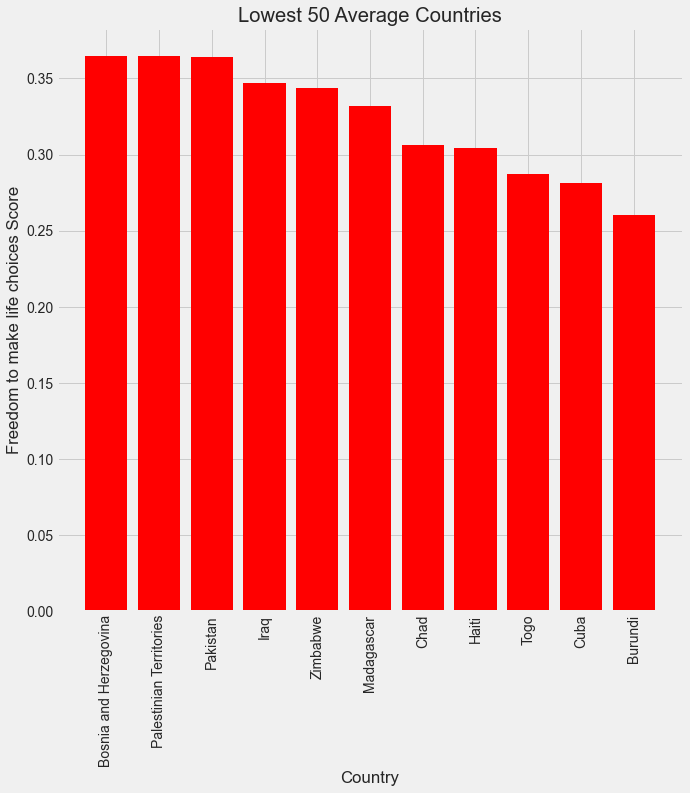

<Figure size 3600x7200 with 0 Axes>

In [34]:
relevant1 = df[["Country name", "year", "Freedom to make life choices"]].tail(50)

relevant1.sort_values(by='Freedom to make life choices', ascending=False)[['Country name', 'year', 'Freedom to make life choices']]
relevant1.groupby('Country name')['Freedom to make life choices'].mean()

plt.rcParams["figure.figsize"] = (10, 10)
plt.bar("Country name","Freedom to make life choices", data = relevant1, color = "red")
plt.title("Lowest 50 Average Countries")
plt.xlabel("Country")
plt.ylabel("Freedom to make life choices Score")
plt.xticks(rotation=90)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(50,100))


The above visualization uses data from the lowest 50 highest averages of all the years between 2005-2020 of the score on a scale of 0-1.0 on their freedom to make life choices. The visualization itself shows the 11 countries with the lowest average scores. From the visualization we can see that Bosnua and Herzegovina, Palestinian Territories, and Pakistan are the 3 countries with the lowest average scores. This finding was also very interesting, but it makes more sense to me than the highest 50. I think given the world situations in many of these places such as 'Palestinian Territories' it is not surprising that they make the bottom of the list. I think when taking into consideration their world events and the current state of their land, it is no surprise they rank themselves as having less freedom to make life choices.

## Positive affect in various Countries as a function of year
This plot below represents the happiness of poeple in countries in a particular year as selected using the slider.
Happiness affect data is collected by surveying a sample from the country asking poeple if they smiled or had a happy moment during the past 24 hours of their lives.

In [35]:
%%html
<iframe src='https://shubhamjain2798.github.io/HappinessData-VegaLite-Viz/' height=800 width="100%"></iframe> 